### 主成分分析（PCA）

PCA (Principal Component Analysis)
* 一个非监督的机器学习算法
* 主要用于数据降维，通过降维可以发现更加便于人类理解的特征
* 其他应用，如可视化、去噪

### 1、主成分分析原理

图

显然，选择特征1的降维方式比选择特征2的降维方式要好。选择特征1的降维后，特征的间隔更加稀疏，区分度更加明显。

问题：有没有更加好的降维方式呢？

图

如上图所示，找到一个轴，让特征点映射到这个轴上之后，其间隔更加明显。
<br>间隔最大，即数据的方差最大化。

问题：如何寻找这样一条轴，使得样本间的所有点映射到这个轴上后方差最大？

第一步：将样本的均值归零（demean）

图

demean：相当于将坐标轴进行了移动，使得样本在每一个特征维度上的均值为0，即$\overline x = 0$
<br>此时，有

$Var(x) = \frac {1}{m}\sum_{i=1}^{m}(x_{i} - \overline x)^2 = \frac {1}{m}\sum_{i=1}^{m}x_{i}^2$

注：此时的$x_{i}$已经是映射到待定轴的特征坐标了。

此时只有两个维度，所以定义待定轴的方向为$W = (w_1,w_2)$，则可得所有样本点映射到$w$之后，有：

$Var(X_{project}) = \frac {1}{m}\sum_{i=1}^{m}(X_{project}^{(i)} - \overline X_{project})^2$ $\qquad$最大化

因为$X_{project}^{(i)}$包含有多个特征，这里只有两个特征维度，所以$X_{project}^{(i)}$是一个行向量，所以有：

$Var(X_{project}) = \frac {1}{m}\sum_{i=1}^{m}||X_{project}^{(i)} - \overline X_{project}||^2 = \frac {1}{m}\sum_{i=1}^{m}||X_{project}^{(i)}||^2$

$\overline X_{project} = 0$ $\quad$零向量

问题：如何使用原来特征数据$X^{(i)}$计算映射后的$X_{project}^{(i)}$

图

如上图所示，$||X_{project}^{(i)}||$就是向量$X^{(i)}$在向量$W$上的投影，由此可得：

$X^{(i)}·W = ||X^{(i)}||·||W||·\cos \theta$

因为我们只需要求得轴的反向向量，所以我们取轴的方向向量即可，即$||W|| = 1$，因此可得：

$X^{(i)}·W = ||X^{(i)}||·||W||·\cos \theta = ||X^{(i)}||·\cos \theta = OA·\cos \theta = OP = ||X_{project}^{(i)}||$

因此，有：

$Var(X_{project}) = \frac {1}{m}\sum_{i=1}^{m}||X_{project}^{(i)}||^2 = \frac {1}{m}\sum_{i=1}^{m}||X^{(i)}·W||^2 = \frac {1}{m}\sum_{i=1}^{m}(X^{(i)}·W)^2$

两个向量的点乘是一个数。

由此，主成分分析算法的求解问题变为：

目标：求$W$，使得$Var(X_{project}) = \frac {1}{m}\sum_{i=1}^{m}(X^{(i)}·W)^2$最大化

拓展到多维有：

$Var(X_{project}) = \frac {1}{m}\sum_{i=1}^{m}(x_{1}^{(i)}w_{1} + x_{2}^{(i)}w_{2} + …… + x_{n}^{(i)}w_{n})^2$

$X^{(i)} = (x_{1}^{(i)},x_{2}^{(i)},……，x_{n}^{(i)})$ $\quad n$个特征维度

典型的非监督学习算法，因为目标函数中只有特征$X^{(i)}$的信息，没有标签（输出）$y^{(i)}$的信息。

### 2、梯度上升法求解PCA

目标：求$W$，使得$f(X) = \frac {1}{m}\sum_{i=1}^{m}(x_{1}^{(i)}w_{1} + x_{2}^{(i)}w_{2} + …… + x_{n}^{(i)}w_{n})^2$最大化

$\triangledown f = \begin{bmatrix} \frac {\alpha f}{\alpha w_1} \\ \frac {\alpha f}{\alpha w_3} \\ \vdots \\ \frac {\alpha f}{\alpha w_n}\end{bmatrix} = \frac {2}{m}X^T(XW)$

### 3、梯度上升法求解PCA问题实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

48.58779276001458 40.2795376570117


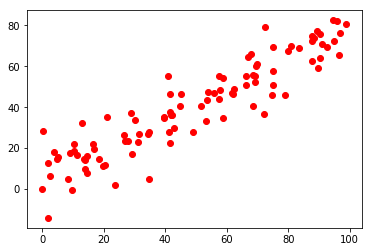

In [2]:
# 产生ndata个样本，每个样本2个特征
np.random.seed(1)
ndata = 100
X = np.empty((ndata, 2))
X[:, 0] = np.random.uniform(0.0, 100.0, size = ndata)
X[:, 1] = 0.75 * X[:, 0] + 3.0 + np.random.normal(0.0, 10.0, size = ndata)

print(np.mean(X[:, 0]), np.mean(X[:, 1]))

plt.scatter(X[:, 0], X[:, 1], color = "r")
plt.show()

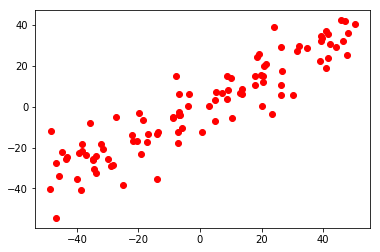

In [3]:
# 数据均值归零
def demean(X):
    return X - np.mean(X, axis = 0)

X_demean = demean(X)
plt.scatter(X_demean[:, 0], X_demean[:, 1], color = "r")
plt.show()

In [4]:
print(np.mean(X_demean[:, 0]), np.mean(X_demean[:, 1]))

-3.3395508580724707e-15 9.592326932761353e-15


In [5]:
# 梯度上升法求解

# 目标函数
def f(W, X):
    return np.sum(X.dot(W)**2)/len(X)

# 目标函数梯度
def df(W, X):
    return X.T.dot(X.dot(W))*2/len(X)

# 使得W的长度等于1
def direction(W):
    return W/np.linalg.norm(W)

def first_component(X, initial_W, eta, n_iters = 1e4, epsition = 1e-8):
    cur_iter = 0
    W = direction(initial_W)
    while cur_iter < n_iters:
        gradient = df(W, X)
        last_W  = W
        W = W + eta * gradient
        W = direction(initial_W)
        if (abs(f(W, X) - f(last_W, X)) < epsition):
            break  
        cur_iter += 1
        
    return W

[0.4359949  0.02592623]
[0.99823666 0.05935967]


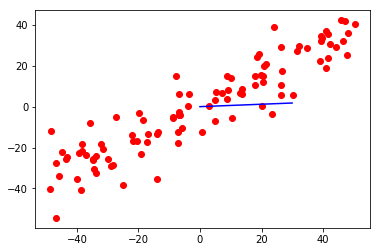

In [6]:
np.random.seed(2)
initial_W = np.random.random(X.shape[1])
print(initial_W)
eta = 0.01
W = first_component(X_demean, initial_W, eta)

print(W)

plt.scatter(X_demean[:, 0], X_demean[:, 1], color = 'r')
plt.plot([0, W[0] * 30], [0, W[1] * 30], color = 'b')
plt.show()